<a href="https://colab.research.google.com/github/aritrasen87/LLM_RAG_Model_Deployment/blob/main/langgraph_supervisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installations

In [ ]:
! pip install langgraph-supervisor --q
! pip install langchain_openai langchain_community langchain_experimental --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.4/151.4 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.7 MB/s eta 0:00:00


### Credentials

In [ ]:
from google.colab import userdata
import os
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_KEY')
os.environ['TAVILY_API_KEY'] = userdata.get('TAVILY')

### LLM Initialization

In [ ]:
from langchain_openai import ChatOpenAI
model = ChatOpenAI(model="gpt-4o")

### Tools creation

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily_tool = TavilySearchResults(max_results=5)

In [ ]:
from langchain_experimental.tools import PythonREPLTool

python_repl_tool = PythonREPLTool()

### MultiAgent with langgraph_supervisor

In [ ]:

from langgraph.prebuilt import create_react_agent

### Create specialized agents

In [ ]:
def web_search(query: str) -> str:
    """Search the web for information."""
    docs = tavily_tool.invoke({"query": query})
    web_results = "\n".join([d["content"] for d in docs])
    return web_results

research_agent = create_react_agent(
    model=model,
    tools=[web_search],
    name="research_expert",
    prompt="You are a world class researcher with access to web search."
)


visualization_agent = create_react_agent(
    model=model,
    tools=[python_repl_tool],
    name="visualization_expert",
    prompt="You are a visualization expert, create visualization using python code. Always use one tool at a time."
)

### Create supervisor workflow

In [ ]:
from langgraph_supervisor import create_supervisor

In [ ]:
workflow = create_supervisor(
    [research_agent, visualization_agent],
    model=model,
    prompt=(
        "You are a team supervisor managing a research expert and a visualization expert. "
        "For current events and information, use research_agent."
        "For creating beatiful visualization using use visualization_agent."
    )
)

# Compile and run
app = workflow.compile()

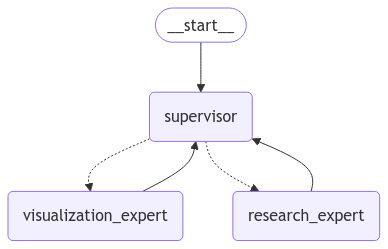

In [ ]:
from IPython.display import Image

display(Image(app.get_graph().draw_mermaid_png()))

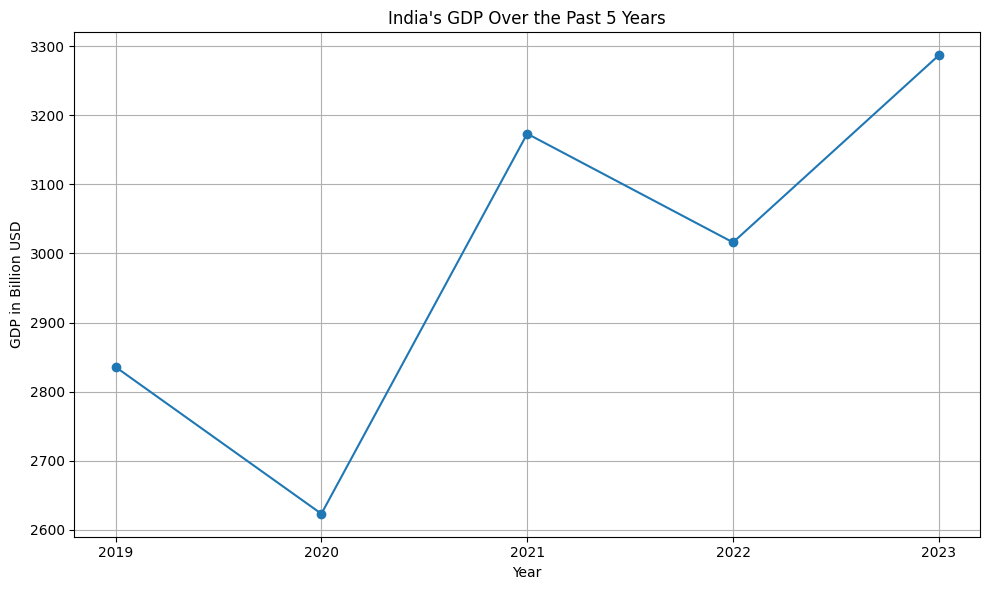

In [ ]:

result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "Fetch the India's GDP over the past 5 years,then draw a line graph of it."
        }
    ]
})

In [ ]:
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

Fetch the India's GDP over the past 5 years,then draw a line graph of it.
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_research_expert (call_0dJPqSy4Ev8HMVFWvJs2lSbv)
 Call ID: call_0dJPqSy4Ev8HMVFWvJs2lSbv
  Args:
================================= Tool Message =================================
Name: transfer_to_research_expert

Successfully transferred to research_expert
================================== Ai Message ==================================
Name: research_expert

I recommend using Adobe Express to create the line graph. Here’s a quick guide on how you can do it:

1. **Visit [Adobe Express Line Graph Maker](https://www.adobe.com/express/feature/graphs/line).**
2. **Input your data:**
   - Title: India's GDP (2019-2023)
   - Horizontal Axis: Year
   - Vertical Axis: GDP (in Billion USD)
   - Add data points for each ye

Hierarchical MultiAgent

In [ ]:
! pip install langchain langchain-community  --upgrade -q
! pip install sentence-transformers -q
! pip install datasets -q
! pip install chromadb -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

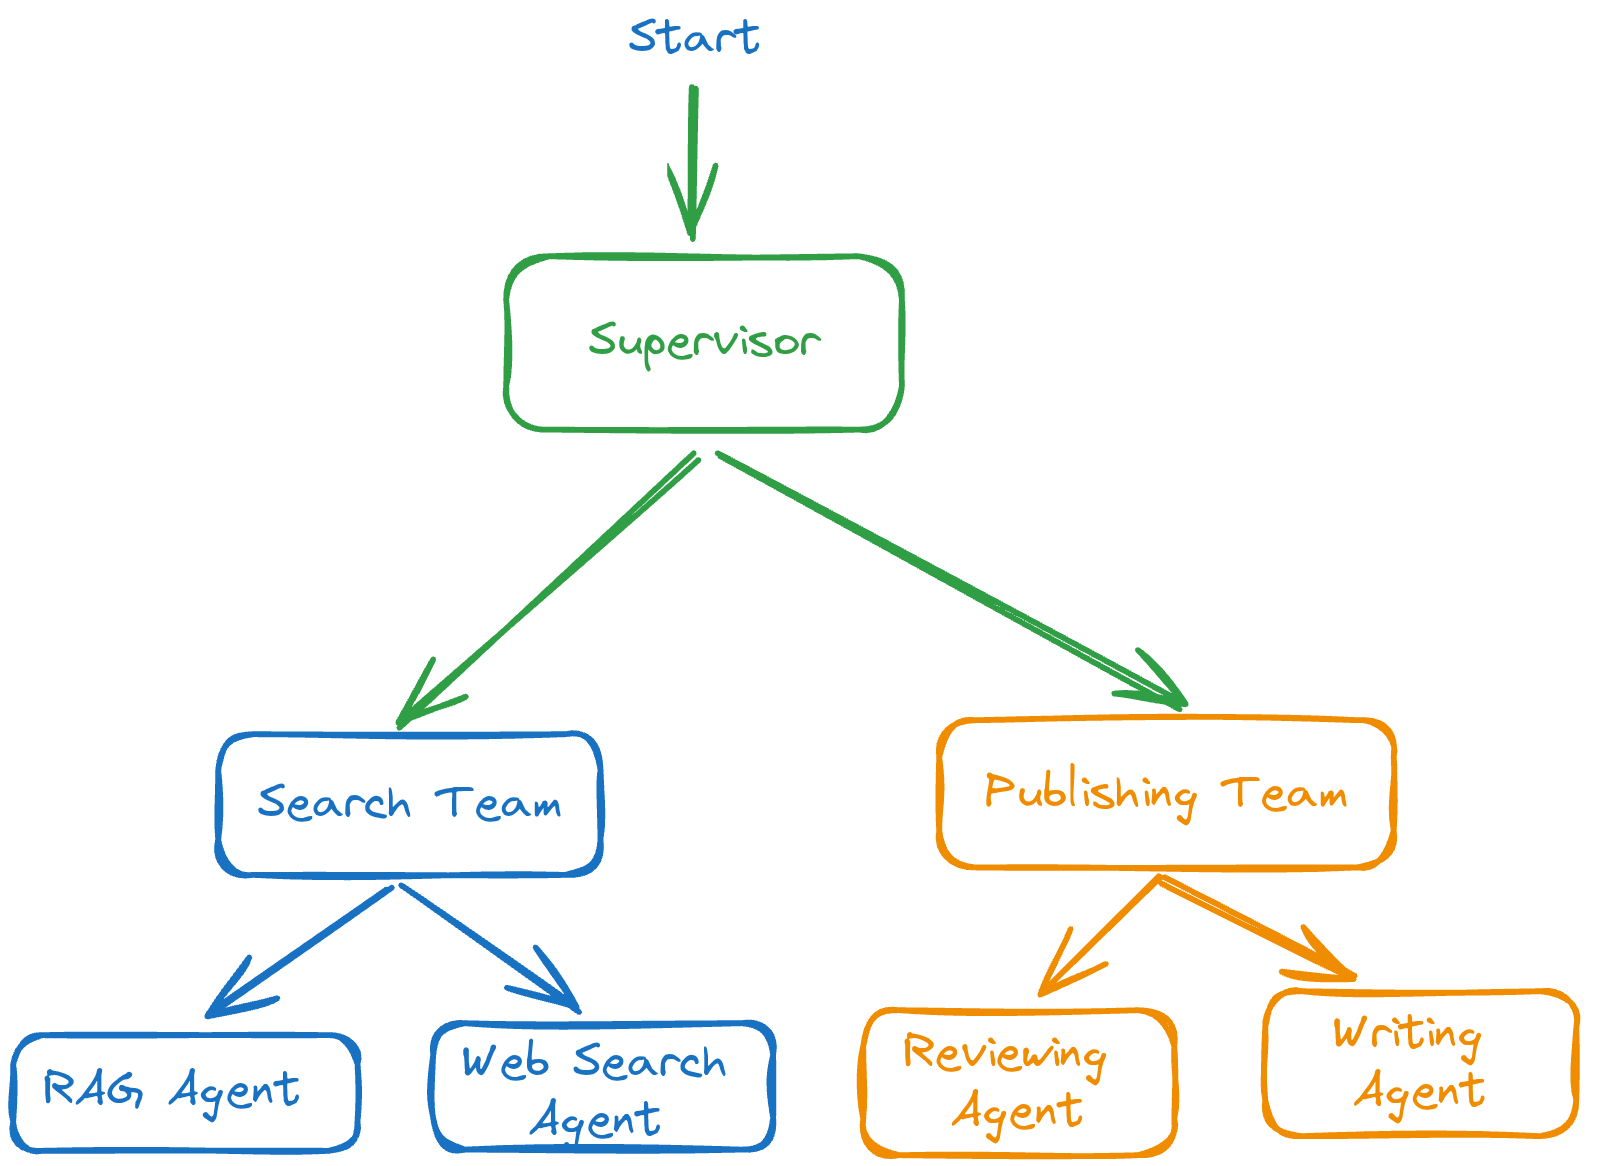

In [ ]:
import datasets
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain.docstore.document import Document


knowledge_base = datasets.load_dataset("m-ric/huggingface_doc", split="train")
knowledge_base = knowledge_base.filter(lambda row: row["source"].startswith("huggingface/transformers"))

source_docs = [
    Document(page_content=doc["text"], metadata={"source": doc["source"].split("/")[1]})
    for doc in knowledge_base
]

### Creating Chunks using RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=50,
    add_start_index=True,
    strip_whitespace=True,
    separators=["\n\n", "\n", ".", " ", ""],
)
new_docs = text_splitter.split_documents(documents=source_docs)

###  BGE Embddings

from langchain_community.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-small-en"
model_kwargs = {"device": "cuda"}
encode_kwargs = {"normalize_embeddings": True}
embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name, model_kwargs=model_kwargs, encode_kwargs=encode_kwargs
)
### Populate Vector DB

db = Chroma.from_documents(new_docs, embeddings)

README.md:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

huggingface_doc.csv:   0%|          | 0.00/22.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2647 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2647 [00:00<?, ? examples/s]

<ipython-input-14-a6728d74d509>:33: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceBgeEmbeddings(
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def rag_search(query:str):
    "Function to do RAG search"
    retriever = db.as_retriever(search_kwargs={"k": 4})
    docs = retriever.invoke(
            query,
        )
    return "\nRetrieved documents:\n" + "".join(
        [
            f"\n\n===== Document {str(i)} =====\n" + doc.page_content
            for i, doc in enumerate(docs)
        ]
    )

In [ ]:
rag_agent = create_react_agent(
    model=model,
    tools=[rag_search],
    name="rag_expert",
    prompt="You are a RAG tool with access to transformer related documents."
)

### Search Team = RAG Agent + Research Agent

In [ ]:
search_team = create_supervisor(
    [research_agent, rag_agent],
    model=model,
    prompt=(
        "You are a team supervisor managing a web search expert and a RAG search expert. "
        "For current events and information, use research_agent."
        "For transformer related information , use rag_agent."
    )
).compile(name="search_team")

In [ ]:
def review_content(input:str):
    "Reviews the content"
    prompt = f"review the given content {input} , make necessary corrections and rewrite in a positive tone "
    return model.invoke(prompt)

reviewing_agent = create_react_agent(
    model=model,
    tools=[review_content], # tools to help reviewing
    name="reviewing_expert",
    prompt="You are a world class reviewing expert. Don't use this tool to write the final output"
)

In [ ]:
def writer(text_to_dump:str):
    "Writes in txt file"
    with open("final.txt", "w") as f:
        f.write(text_to_dump)
    print("Text has been written to final.txt")

writing_agent = create_react_agent(
    model=model,
    tools=[writer],
    name="writing_expert",
    prompt="You are a world class writing expert. Your job is write the final content in a text file"
)


### Publishing Team = Reviewing Agent + Writing Agent

In [ ]:
publishing_team = create_supervisor(
    [reviewing_agent , writing_agent],
    model=model,
    prompt=(
        "You are a team supervisor managing a reviewing expert and a writing expert. "
        "For making correction in the content, use reviewing_agent."
        "For writing final content in a text file ,make sure you only use writing_agent."
    )
).compile(name="publishing_team")

In [ ]:
top_level_supervisor = create_supervisor(
    [search_team, publishing_team],
    model=model,
    prompt=("you are a top level supervisor managing a search team and publishing team."
            "For recent events and information, use search_team."
            "For reviewing and writing final content in a text file , use publishing_team."
            "Always do handoff to the publishing_team and Use writing_agent in the publishing_team to write into a text file"
    ),
    output_mode="full_history" #output_mode="last_message" during handover
).compile(name="top_level_supervisor")

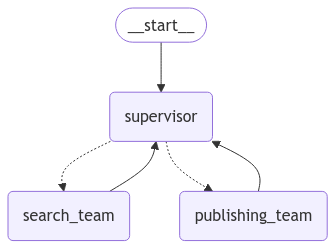

In [ ]:
from IPython.display import Image

display(Image(top_level_supervisor.get_graph().draw_mermaid_png()))

In [ ]:
result = top_level_supervisor.invoke({
    "messages": [
        {
            "role": "user",
            "content": "Tell me the role of Q,K,V matrixes in transfromer archietecture , review the content and then write into a text file."
        }
    ]
})

Text has been written to final.txt


In [ ]:
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

Tell me the role of Q,K,V matrixes in transfromer archietecture , review the content and then write into a text file.
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_search_team (call_Mi9mwmJEwjEIe7P16HwjTGOj)
 Call ID: call_Mi9mwmJEwjEIe7P16HwjTGOj
  Args:
================================= Tool Message =================================
Name: transfer_to_search_team

Successfully transferred to search_team
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_rag_expert (call_JQ1OGBa9bbsfzOlhI4yVkuD4)
 Call ID: call_JQ1OGBa9bbsfzOlhI4yVkuD4
  Args:
================================= Tool Message =================================
Name: transfer_to_rag_expert

Successfully transferred to rag_expert
================================== Ai Message =====================